In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean.cm as cmo
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import datetime

In [21]:
# Load in the URL for the Real-Time Science data from tabledap http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru23-20221011T1759-profile-sci-rt.html
# url  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru23-20221011T1759-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_470nm%2Cbeta_532nm%2Cbeta_660nm%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cinstrument_bb3slo%2Cinstrument_ctd%2Cinstrument_fl3slo%2Cm_pitch%2Cm_roll%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_fl3slo_cdom_units%2Csci_fl3slo_chlor_units%2Csci_fl3slo_phyco_units%2Csci_m_present_time%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-10-11T19%3A27%3A56.64Z&time%3C=2022-11-01T14%3A49%3A57.49Z'
# url = "https://gliders.ioos.us/erddap/tabledap/usf-gansett-20230824T1200.csv?trajectory%2Cwmo_id%2Cprofile_id%2Ctime%2Clatitude%2Clongitude%2Cdepth%2Cconductivity%2Cconductivity_qc%2Ccrs%2Cdensity%2Cdensity_qc%2Cdepth_qc%2Cinstrument_ctd%2Clat_uv%2Clat_uv_qc%2Clatitude_qc%2Clon_uv%2Clon_uv_qc%2Clongitude_qc%2Cplatform_meta%2Cprecise_lat%2Cprecise_lat_qc%2Cprecise_lon%2Cprecise_lon_qc%2Cprecise_time%2Cprecise_time_qc%2Cpressure%2Cpressure_qc%2Csalinity%2Csalinity_qc%2Csource_file%2Ctemperature%2Ctemperature_qc%2Ctime_qc%2Ctime_uv%2Ctime_uv_qc%2Cu%2Cu_qc%2Cv%2Cv_qc&time%3E=2023-08-22T00%3A00%3A00Z&time%3C=2023-08-29T19%3A32%3A17Z"
# url = "http://slocum-data.marine.rutgers.edu/erddap/tabledap/ud_476-20230822T2018-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cinstrument_bsipar%2Cinstrument_ctd%2Cinstrument_minipat%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_bsipar_par%2Csci_bsipar_sensor_volts%2Csci_bsipar_supply_volts%2Csci_bsipar_temp%2Csci_m_disk_free%2Csci_m_present_time%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2023-08-24T00%3A00%3A00.00Z&time%3C=2023-08-31T07%3A55%3A46.84Z"
url = "https://gliders.ioos.us/erddap/tabledap/usf-jaialai-20230806T1200.csv?trajectory%2Cwmo_id%2Cprofile_id%2Ctime%2Clatitude%2Clongitude%2Cdepth%2Cconductivity%2Cconductivity_qc%2Ccrs%2Cdensity%2Cdensity_qc%2Cdepth_qc%2Cinstrument_ctd%2Clat_uv%2Clat_uv_qc%2Clatitude_qc%2Clon_uv%2Clon_uv_qc%2Clongitude_qc%2Cplatform_meta%2Cprecise_lat%2Cprecise_lat_qc%2Cprecise_lon%2Cprecise_lon_qc%2Cprecise_time%2Cprecise_time_qc%2Cpressure%2Cpressure_qc%2Csalinity%2Csalinity_qc%2Csource_file%2Ctemperature%2Ctemperature_qc%2Ctime_qc%2Ctime_uv%2Ctime_uv_qc%2Cu%2Cu_qc%2Cv%2Cv_qc&time%3E=2023-08-24T00%3A00%3A00Z&time%3C=2023-08-31T03%3A42%3A16Z"
usf_rt = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
# usf_rt

(-100.0, 0.0)

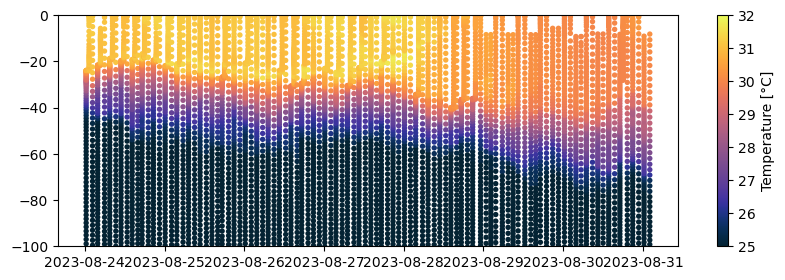

In [23]:
# We can plot these in 2D
fig = plt.figure(figsize=(10,3))
plt.scatter(usf_rt['time'],-usf_rt['depth'],15,usf_rt['temperature'],vmin=25, vmax=32, marker="o", edgecolors='none',cmap = cmo.thermal)
cb = plt.colorbar()
cb.set_label('Temperature [°C]')
plt.ylim(-100,0)
# plt.xlim(datetime.date(2023,8,23),datetime.date(2023,9,1))


In [ ]:
# Now we can plot our data on top of a nice map from Mike Smith's cool_maps
extent     = [-85, -83, 26, 32]
markersize = 5;

fig,ax  = cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -100, -50, -20, -10), figsize=(10,6), oceancolor='w')
ax_posi = plt.scatter(ru23_rt['longitude'],ru23_rt['latitude'],ru23_rt['depth'],c=ru23_rt['time'], marker="o", edgecolors='none',cmap='cool', transform=ccrs.PlateCarree())

#Add in a title
plt.title('MOO Endurance Line Deployment of RU23');

# Date colorbar code taken from: https://stackoverflow.com/questions/51160705/plot-time-series-with-colorbar-in-pandas-matplotlib
# Define your mappable for colorbar creation
sm = plt.cm.ScalarMappable(cmap='cool', 
                           norm=plt.Normalize(vmin=ru23_rt['time'].min().value,
                                              vmax=ru23_rt['time'].max().value));
sm._A = [];
# Add your colorbar
cbar = plt.colorbar(sm);
# Change the numeric ticks into ones that match. Time format options detailed here: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %d'));
